# Double Resolution 2017 SoG Deep Water Renewal Events

This notebook explores the Strait of Georgia (SoG) deep water renewal events in 2017
by comparing output extracted from the double resolution experiment runs of
SalishSeaCast.202111 and observations from the Ocean Networks Canada (ONC)
central node (SCVIP).

The packages required by this notebook are defined in the conda environment file 
`analysis-doug/notebooks/2xrez-2017/environment.yaml` along with instructions 
on how to create an isolated environment containing the latest versions of those packages. 

## Data Sources

* In Sep-2022 the SalishSeaCast.202111 double resolution experiment runs results were stored in
  `/results2/SalishSea/hindcast-blue.double/`
* A time series of hour-averaged temperature and salinity in a 5x5x5 region centred on the SalishSeaCast
  T-grid point that is nominally closest to the ONC SCVIP node was extracted from the model results dataset
  using [Reshapr](https://github.com/UBC-MOAD/Reshapr).
  In Sep-2002 it is stored at `/ocean/dlatorne/SalishSeaCast_2xrez_ONC_SCVIP_hour_TS_20170101_20171231.nc`
* 15 minute averaged observations from the ONC SCVIP node are available from the SalishSeaCast
  ERDDAP server at https://salishsea.eos.ubc.ca/erddap/info/ubcONCSCVIPCTD15mV1/index.html

The Reshapr extraction configuration used was:
```yaml
# reshapr extract processing configuration for hour-averaged temperature 
# and salinity fields at ONC SoG cental node (SCVIP) from SalishSeaCast.202111 
# double resolution experiment 
# 
# SCVIP location data from SalishSeaTools/salishsea_tools/places.py: 
#    'Central node': { 
#        # location from Ocean Networks Canada (ONC) website 
#        'lon lat': (-123.425825, 49.040066666), 
#        # depth in metres from ONC website 
#        'depth': 294, 
#        # corresponding python vertical grid index 
#        'NEMO grid k': 34, 
#        # NEMO python grid indices: j in y direction, i in x direction 
#        'NEMO grid ji': (424, 266), 
#        # HRDPS python grid indices: j in y direction, i in x direction 
#        'wind grid ji': (133, 147), 
#        # ONC data web services API station code 
#        'ONC stationCode': 'SCVIP', 
#    }

dataset:
  model profile: SalishSeaCast-202111-2xrez-salish.yaml
  time base: hour
  variables group: physics tracers

dask cluster: salish_cluster.yaml

start date: 2017-01-01
end date: 2017-12-31

extract variables:
  - votemper
  - vosaline

selection:
  depth:
    depth min: 66
    depth max: 71
  grid y:
    y min: 846
    y max: 851
  grid x:
    x min: 530
    x max: 535

include lons lats: True

extracted dataset:
  name: SalishSeaCast_2xrez_ONC_SCVIP_hour_TS
  description: Hour-averaged temperature & salinity extracted from
               SalishSeaCast v202111 double resolution experiment
               around ONC SoG central node (SCVIP)
  dest dir: /ocean/dlatorne
```

## Setup

Python imports:

In [1]:
from pathlib import Path
import sys

import matplotlib
import matplotlib.pyplot as plt
import netCDF4
import numpy
import pandas
import xarray

Python and library versions:

In [2]:
print(f"Python {sys.version=}")
print(f"{numpy.__version__=}")
print(f"{pandas.__version__=}")
print(f"{xarray.__version__=}")
print(f"{netCDF4.__version__=}")
print(f"{matplotlib.__version__=}")

Python sys.version='3.10.6 | packaged by conda-forge | (main, Aug 22 2022, 20:35:26) [GCC 10.4.0]'
numpy.__version__='1.23.3'
pandas.__version__='1.4.4'
xarray.__version__='2022.6.0'
netCDF4.__version__='1.6.1'
matplotlib.__version__='3.6.0'


## Model Results

In [3]:
model_ds_path = Path("/ocean/dlatorne/SalishSeaCast_2xrez_ONC_SCVIP_hour_TS_20170101_20171231.nc")
model_ds = xarray.open_dataset(model_ds_path)

model_ds

<xarray.Dataset>
Dimensions:    (time: 8760, depth: 5, gridY: 5, gridX: 5)
Coordinates:
  * time       (time) datetime64[ns] 2017-01-01T00:30:00 ... 2017-12-31T23:30:00
  * depth      (depth) float32 264.1 277.7 291.4 305.0 318.7
  * gridY      (gridY) int64 846 847 848 849 850
  * gridX      (gridX) int64 530 531 532 533 534
Data variables:
    votemper   (time, depth, gridY, gridX) float32 ...
    vosaline   (time, depth, gridY, gridX) float32 ...
    longitude  (gridY, gridX) float32 ...
    latitude   (gridY, gridX) float32 ...
Attributes:
    name:         SalishSeaCast_2xrez_ONC_SCVIP_hour_TS_20170101_20171231
    description:  Hour-averaged temperature & salinity extracted from SalishS...
    history:      2022-09-15 16:06 -07:00: Generated by `reshapr extract /oce...
    Conventions:  CF-1.6

## ONC Observations

ONC node observations are stored on our ERDDAP server in tabular form.

Load a CSV of time, salinity & temperature for 2017 into a Pandas dataframe
to see what it looks like:

In [162]:
obs_df_path = (
    "https://salishsea.eos.ubc.ca/erddap/tabledap/ubcONCSCVIPCTD15mV1.csv"
    "?time%2Csalinity%2Ctemperature"
    "&time%3E=2017-01-01T00%3A00%3A00Z&time%3C=2017-12-31T23%3A45%3A00Z"
)
obs_df = pandas.read_csv(obs_df_path)

obs_df

,time,salinity,temperature
0,UTC,g/kg,degrees_Celcius
1,2017-01-01T00:00:00Z,31.378669435885715,9.8411
2,2017-01-01T00:15:00Z,31.387963053600004,9.834900000000001
3,2017-01-01T00:30:00Z,31.39233356571429,9.8325
4,2017-01-01T00:45:00Z,31.393539224228572,9.8318
...,...,...,...
29700,2017-12-30T15:45:00Z,31.328082519221383,9.713693966480443
29701,2017-12-30T16:00:00Z,31.32839392487484,9.713890837988854
29702,2017-12-30T16:15:00Z,31.328436470924796,9.716227932960898
29703,2017-12-30T16:30:00Z,31.330356094816306,9.720747709497193


Reload the dataframe in a way that is more useful for analysis:

In [176]:
obs_df = pandas.read_csv(
    obs_df_path, 
    header=0,  # use 1st row as labels
    index_col="time",  # use time column as index
    skiprows=lambda n: n == 1,  # skip 2nd row containing units strings
    parse_dates=True  # convert contents of time column from strings to datetime64
)

obs_df

,salinity,temperature
time,,
2017-01-01 00:00:00+00:00,31.378669,9.841100
2017-01-01 00:15:00+00:00,31.387963,9.834900
2017-01-01 00:30:00+00:00,31.392334,9.832500
2017-01-01 00:45:00+00:00,31.393539,9.831800
2017-01-01 01:00:00+00:00,31.394243,9.831600
...,...,...
2017-12-30 15:45:00+00:00,31.328083,9.713694
2017-12-30 16:00:00+00:00,31.328394,9.713891
2017-12-30 16:15:00+00:00,31.328436,9.716228


In [165]:
# expected number of rows (15 minute averages)
366 * 24 * 4

35136

So, there is clearly less than the full year of observations.

## Compare Model Grid Locations to Nominal Observations Location

In [8]:
obs_info = { 
    # location from Ocean Networks Canada (ONC) website 
    'lon lat': (-123.425825, 49.040066666), 
    # depth in metres from ONC website 
    'depth': 294, 
    # corresponding python vertical grid index 
    'NEMO grid k': 34, 
    # NEMO python grid indices: j in y direction, i in x direction 
    'NEMO grid ji': (424, 266), 
    # HRDPS python grid indices: j in y direction, i in x direction 
    'wind grid ji': (133, 147), 
    # ONC data web services API station code 
    'ONC stationCode': 'SCVIP', 
}
obs_lon, obs_lat = obs_info["lon lat"]

Depth:

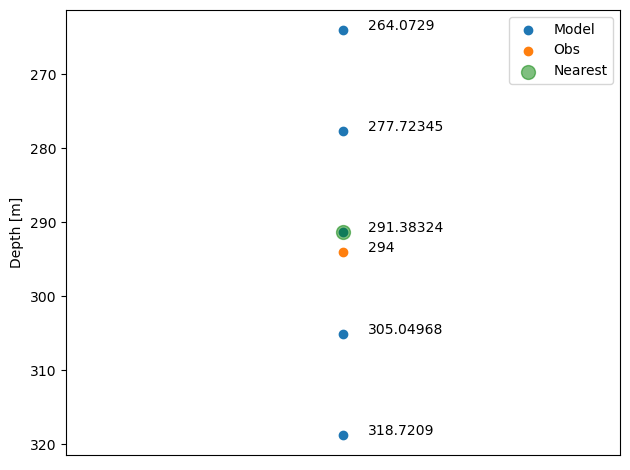

In [187]:
fig, ax = plt.subplots(1, 1)
depths = slice(0, 5)
ax.scatter(
    numpy.ones_like(model_ds.depth.isel(depth=depths)), 
    model_ds.depth.isel(depth=depths),
    label="Model"
)
for depth in model_ds.depth:
    ax.annotate(depth.values, xy=(1.005, depth.values))

ax.scatter(numpy.array([1]), numpy.array([obs_info["depth"]]), label="Obs")
ax.annotate(f"{obs_info['depth']}", xy=(1.005, obs_info["depth"]))

ax.scatter(
    numpy.array([1]), model_ds.depth.isel(depth=2), 
    c="green", marker="o", s=100.0, alpha=0.5,
    label="Nearest"
)

ax.set_xticks(ticks=[])
ax.set_ylabel("Depth [m]")
ax.invert_yaxis()
ax.legend()
plt.tight_layout()

y-x plane:

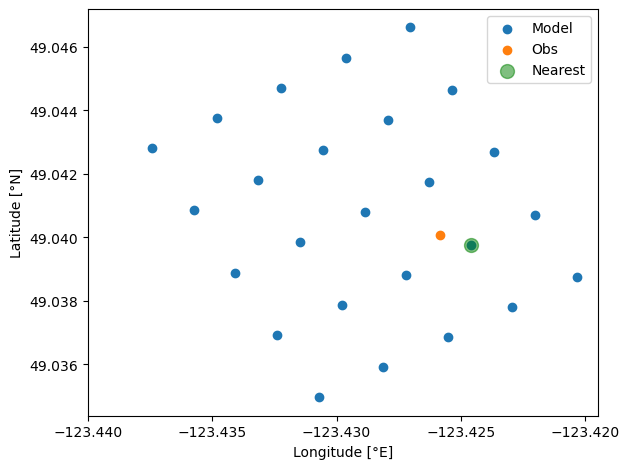

In [186]:
fig, ax = plt.subplots(1, 1)
ys, xs = slice(0, 5), slice(0, 5)
ax.scatter(
    model_ds.longitude.isel(gridX=xs), model_ds.latitude.isel(gridY=ys),
    label="Model"
)

ax.scatter(obs_lon, obs_lat, label="Obs")

ax.scatter(
    model_ds.longitude.isel(gridX=3, gridY=1), model_ds.latitude.isel(gridX=3, gridY=1), 
    c="green", marker="o", s=100.0, alpha=0.5,
    label="Nearest"
)

ax.set_xlabel("Longitude [°E]")
ax.ticklabel_format(axis="x", useOffset=False)
ax.set_xticks(ax.get_xticks()[::2])
ax.set_ylabel("Latitude [°N]")
ax.legend()
plt.tight_layout()

Confirm that nearest model point is in water by inspecting a salinity value:

In [116]:
idepth, iy, ix = 2, 1, 3
model_pt = {"depth": idepth, "gridY": iy, "gridX": ix}
model_ds.vosaline.isel(time=0, **model_pt)

<xarray.DataArray 'vosaline' ()>
array(31.483793, dtype=float32)
Coordinates:
    time     datetime64[ns] 2017-01-01T00:30:00
    depth    float32 291.4
    gridY    int64 847
    gridX    int64 533
Attributes:
    standard_name:  sea_water_reference_salinity
    long_name:      salinity
    units:          g kg-1

## Salinity for the Whole Year

First, let's confirm that there is something interesting to look at in both datasets.

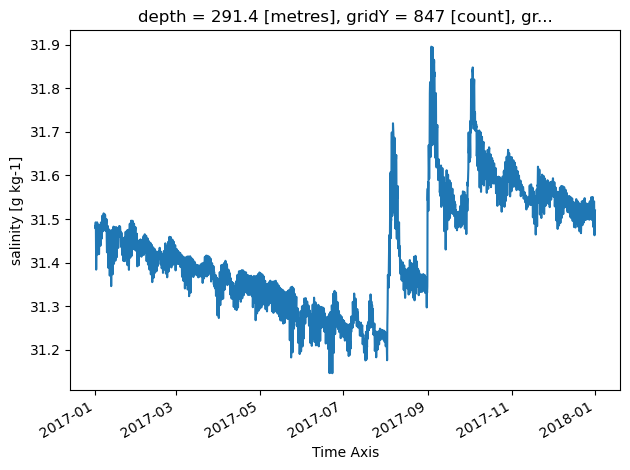

In [184]:
model_ds.vosaline.isel(model_pt).plot()
plt.tight_layout()

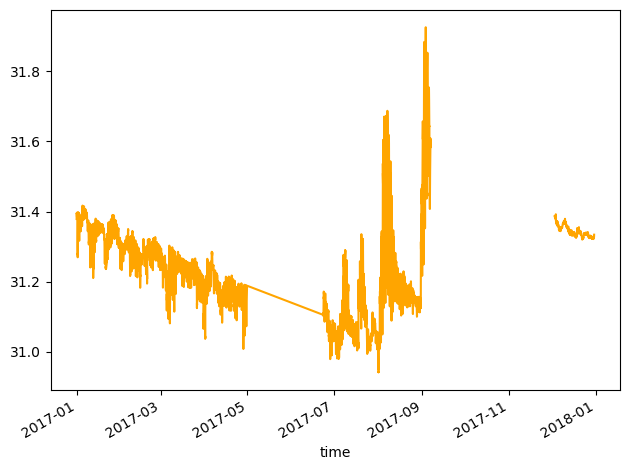

In [183]:
obs_df.salinity.plot(c="orange")
plt.tight_layout()

Now, overlayed:

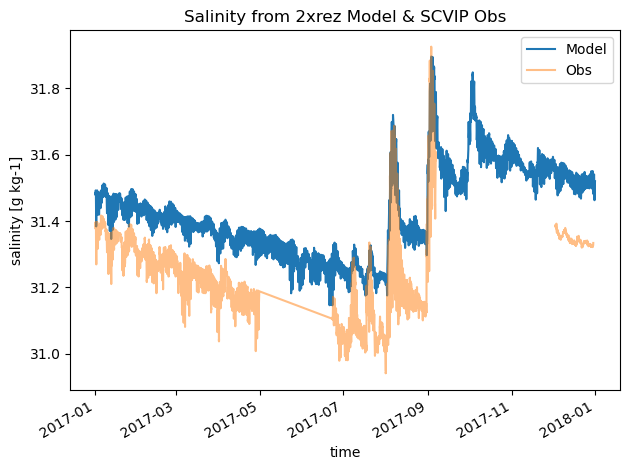

In [188]:
fig, ax = plt.subplots(1, 1)
model_ds.vosaline.isel(model_pt).plot(ax=ax, label="Model")
obs_df.salinity.plot(ax=ax, label="Obs", alpha=0.5)

ax.legend()
plt.title("Salinity from 2xrez Model & SCVIP Obs")
plt.tight_layout()

Qualitative observations:

* Model has a salty bias compared to sensor obs, and that bias increases with time.

* Model matches timing of sensor obs spring-neap salinity variations fairly well,
  though there is a salty bias in the fresh troughs of those variations,
  not unlike the regular resolution model.